# Project Overview

Aim is to predict the sales of each product at a particular outlet.


## Data Dictionary

**Attribute**| **Description**  
--- | ---
Item_Identifer | Unique product id
Item_Weight | Weight of Product
Item_Fat_Content | Whether the product is low fat or regular 
Item_Visibility  | Percentage of total display area of all products in a store allocated in the particlar product
Item_Type | The cateogry to which the product belongs
Item_MRP | Maximum Retail Price of the product
Outlet_Identifier | Unique store id
Outlet_Establishment_Year | The year in whch store was established
Outlet_Size | The size of the store in terms of ground area covered
Outlet_location_type | The type of area in which the storoe is located
Outlet_Type | Whether the outlet is a grocery store or some sort of supermarket
Item_Outlet_Sales | Sales of the product in the particular store. This is the target variable to be predicted. 


## **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as miss

# Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# Models and evaluation metrics
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
# setting random state for reproducibility
SEED = 321
np.random.seed(SEED)
## matplotlib style


fav_style = ('ggplot','tableau-colorblind10')
fav_context = {'context':'notebook', 'font_scale':1.1}
plt.style.use(fav_style)
sns.set_context(**fav_context)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'

# Set global scikit_learn configuration
from sklearn import set_config
set_config(display='diagram')

## **Functions**

  **Metrics for X_train**

  mae = mean_absolute_error(y_train, model_pipeline.predict(x_train))

  mse = mean_squared_error(y_train, model_pipeline.predict(x_train))

  rmse = np.sqrt(mean_squared_error(y_train, model_pipeline.predict(x_train)))

  r2 = r2_score(y_train, model_pipeline.predict(x_train))

  **Metrics for X_test**

  mae = mean_absolute_error(y_test, model_pipeline.predict(x_test))

  mse = mean_squared_error(y_test, model_pipeline.predict(x_test))

  rmse = np.sqrt(mean_squared_error(y_test, model_pipeline.predict(x_test)))

  r2 = r2_score(y_test, model_pipeline.predict(x_test))

In [2]:
# Create a function to take the true and predicted values
# and print MAE, MSE, RMSE, and R2 metrics
def model_metrics(pipe,x_train, y_train, x_test, y_test, 
                  model_name='Regression Model', ):
                  
  # Train
  mae = round(mean_absolute_error(y_train, pipe.predict(x_train)),4)
  mse = round(mean_squared_error(y_train, pipe.predict(x_train)),4)
  rmse = round(np.sqrt(mean_squared_error(y_train, pipe.predict(x_train))),4)
  r2 = round(r2_score(y_train, pipe.predict(x_train)),7)
  print(f'{model_name} Train Scores')
  print(f'MAE: {mae:,.4f} \nMSE: {mse:,.4f} \nRMSE: {rmse:,.4f} \nR2: {r2:.4f}\n')

  # Test
  mae = round(mean_absolute_error(y_test, pipe.predict(x_test)),4)
  mse = round(mean_squared_error(y_test, pipe.predict(x_test)),4)
  rmse = round(np.sqrt(mean_squared_error(y_test, pipe.predict(x_test))),4)
  r2 = round(r2_score(y_test, pipe.predict(x_test)),7)

  # Display the metrics for the model
  print(f'{model_name} Test Scores')
  print(f'MAE: {mae:,.4f} \nMSE: {mse:,.4f} \nRMSE: {rmse:,.4f} \nR2: {r2:.4f}\n')

In [3]:
def evaluate_regression(model, X_train,y_train, X_test, y_test): 
    """Evaluates a scikit learn regression model using r-squared and RMSE"""
    
    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train, 
                                            squared=False)
    
    print(f"Training Data:\tR^2= {r2_train:.2f}\tRMSE= {rmse_train:.2f}")
        
    
    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test, 
                                            squared=False)
    
    print(f"Test Data:\tR^2= {r2_test:.2f}\tRMSE= {rmse_test:.2f}")

## **Load and Data Inspection**

In [4]:
pip install pandas numpy scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
# loading the data files 
df = pd.read_csv('/Users/christianrim/Documents/Supermarket/Data/sales_prediction.csv', decimal=',')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047301,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138
1,DRC01,5.92,Regular,0.019278216,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.5,Low Fat,0.016760075,Meat,141.618,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,FDX07,19.2,Regular,0,Fruits and Vegetables,182.095,OUT010,1998,NaN,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
# a concise summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Item_Identifier            8523 non-null   object
 1   Item_Weight                7060 non-null   object
 2   Item_Fat_Content           8523 non-null   object
 3   Item_Visibility            8523 non-null   object
 4   Item_Type                  8523 non-null   object
 5   Item_MRP                   8523 non-null   object
 6   Outlet_Identifier          8523 non-null   object
 7   Outlet_Establishment_Year  8523 non-null   int64 
 8   Outlet_Size                6113 non-null   object
 9   Outlet_Location_Type       8523 non-null   object
 10  Outlet_Type                8523 non-null   object
 11  Item_Outlet_Sales          8523 non-null   object
dtypes: int64(1), object(11)
memory usage: 799.2+ KB


In [7]:
# checking for missing values
df.isnull().sum()

# Descriptive statistics
df.describe(exclude='number')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060,8523,8523,8523,8523,8523,6113,8523,8523,8523
unique,1559,415,5,7880,16,5938,10,3,3,4,3493
top,FDW13,12.15,Low Fat,0,Fruits and Vegetables,172.0422,OUT027,Medium,Tier 3,Supermarket Type1,958.752
freq,10,86,5089,526,1232,7,935,2793,3350,5577,17


## Data Cleaning

In [8]:
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable')

There are 8523 rows, and 12 columns.
The rows represent 8523 observations, and the columns represent 11 features and 1 target variable


In [9]:
# clean extra spaces 
df.columns = df.columns.str.strip()
df.head()

pd.set_option('display.max_columns',0)


### **Remove Unnecessary Columns**

- There are no columns to drop


### **Remove Unecessary Rows**



### **Remove Duplicates**


In [10]:
# Display the number of duplicate rows in the data
print(f'There are {df.duplicated().sum()} duplicate rows.')

df.drop_duplicates(keep='first', inplace=True)
df.shape

There are 0 duplicate rows.


(8523, 12)

### Handling Missing Data

In [11]:
# identifying missing data 
df.isna().sum()

# identifying missing values
print(df.isna().sum().sum(), 'missing values')

3873 missing values


In [12]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
df['Item_Weight'] = pd.to_numeric(df['Item_Weight'], errors='coerce')

In [14]:
# Filling missing values
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)


df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)


In [15]:
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable')

There are 8523 rows, and 12 columns.
The rows represent 8523 observations, and the columns represent 11 features and 1 target variable


In [16]:
# checking for missing values
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### **Display Data Types**

In [17]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility               object
Item_Type                     object
Item_MRP                      object
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales             object
dtype: object

In [18]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047301,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138
1,DRC01,5.92,Regular,0.019278216,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760075,Meat,141.618,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,FDX07,19.20,Regular,0,Fruits and Vegetables,182.095,OUT010,1998,Medium,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [19]:
# onverting into a float
df['Item_Outlet_Sales'] = df['Item_Outlet_Sales'].astype('float')
df['Item_MRP'] = df['Item_MRP'].astype('float')
df['Item_Visibility'] = df['Item_Visibility'].astype('float')


df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

- Dataset has a combo of object and numeric data types. 

#### **'Item_Fat_Content' Column**

In [20]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [21]:
df.groupby(['Item_Fat_Content'])['Item_Fat_Content'].count()

Item_Fat_Content
LF          316
Low Fat    5089
Regular    2889
low fat     112
reg         117
Name: Item_Fat_Content, dtype: int64

In [22]:
dict = {'low fat': 'Low Fat', 'reg':'Regular', 'LF':'Low Fat'}
df.replace({'Item_Fat_Content':dict}, inplace=True)

In [23]:
df.groupby(['Item_Fat_Content'])['Item_Fat_Content'].count()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

#### **Missing values in Item Weight**

In [24]:
# loop through the index values 
for ind in df.index:
  item_filter = df['Item_Identifier'] == df.loc[ind,'Item_Identifier']

  # measuring the rounded value of the mean 'item_weight' of this rows 'item_identifier'
  item_weight_avg = round(df.loc[item_filter,'Item_Weight'].mean(), 3)

  # assign the average item weight to the 'Item_Weight' column
  df.loc[ind, 'Item_Weight'] = item_weight_avg 

In [25]:
print(df.Item_Weight.isnull().sum())
df[df.Item_Weight.isnull()]

0


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [26]:
df['Item_Weight'].unique()

array([ 9.745,  7.076, 16.174, ..., 11.614, 13.751, 12.293])

#### **Missing Values in Outlet_Size**

In [27]:
df['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

### **Inspect Column Names for Errors**

In [28]:
data_types = df.dtypes
str_cols = data_types[data_types=='object'].index
str_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

#### **Numeric Columns**

In [29]:
df.describe(include='number')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.846768,0.066132,140.992782,1997.831867,2181.288914
std,3.891114,0.051598,62.275067,8.371760,1706.499616
min,4.820000,0.000000,31.290000,1985.000000,33.290000
25%,9.491500,0.026989,93.826500,1987.000000,834.247400
50%,12.675000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.250000,0.328391,266.888400,2009.000000,13086.964800


#### **Categorical Columns**

In [30]:
df.describe(include='object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,8523,8523,8523
unique,1559,2,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5517,1232,935,5203,3350,5577


In [31]:
data_types = df.dtypes
object_data_types = data_types[(data_types == 'object')]
object_data_types

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

In [32]:
df['Item_Outlet_Sales'].unique()

array([3735.138 ,  443.4228, 2097.27  , ..., 7182.6504, 3608.636 ,
       2778.3834])

In [33]:
df.groupby(['Item_Type'])['Item_Type'].count()

Item_Type
Baking Goods              648
Breads                    251
Breakfast                 110
Canned                    649
Dairy                     682
Frozen Foods              856
Fruits and Vegetables    1232
Hard Drinks               214
Health and Hygiene        520
Household                 910
Meat                      425
Others                    169
Seafood                    64
Snack Foods              1200
Soft Drinks               445
Starchy Foods             148
Name: Item_Type, dtype: int64

In [34]:
df['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [35]:
df.groupby(['Outlet_Size'])['Outlet_Size'].count()

Outlet_Size
High       932
Medium    5203
Small     2388
Name: Outlet_Size, dtype: int64

#### **Changing the values in columns**

In [36]:
#  getting categorical and numerical columns 
cat_cols = df.select_dtypes(exclude='object').columns.to_list()
num_cols = df.select_dtypes(exclude='number').columns.to_list()

print('Categorical Columns: ', cat_cols)
print('Numerical Columns: ', num_cols)


Categorical Columns:  ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
Numerical Columns:  ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.1+ MB


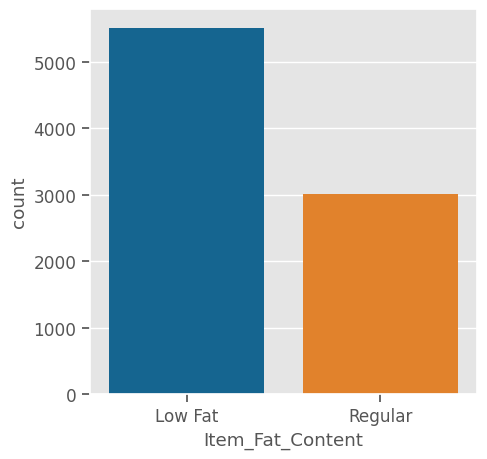

In [38]:
plt.figure(figsize=(5,5))
sns.countplot(x='Item_Fat_Content', data=df)
plt.show()

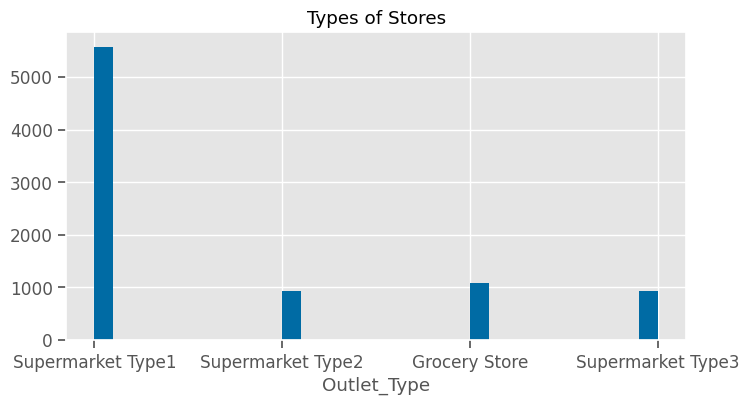

In [39]:
#Maximum Retail Price Distribution - OOP with ax.set()
fig, ax = plt.subplots(figsize=(8,4))
ax.hist(df['Outlet_Type'],bins=30);
ax.set(xlabel="Outlet_Type", 
       title='Types of Stores');

[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

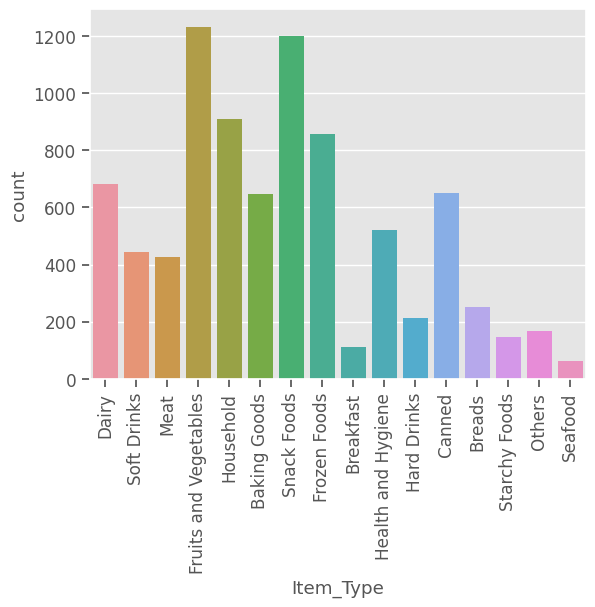

In [40]:
# displays the various products sold 
labels = list(df['Item_Type'].unique())
chart = sns.countplot(x=df['Item_Type'])
chart.set_xticklabels(labels=labels, rotation=90)

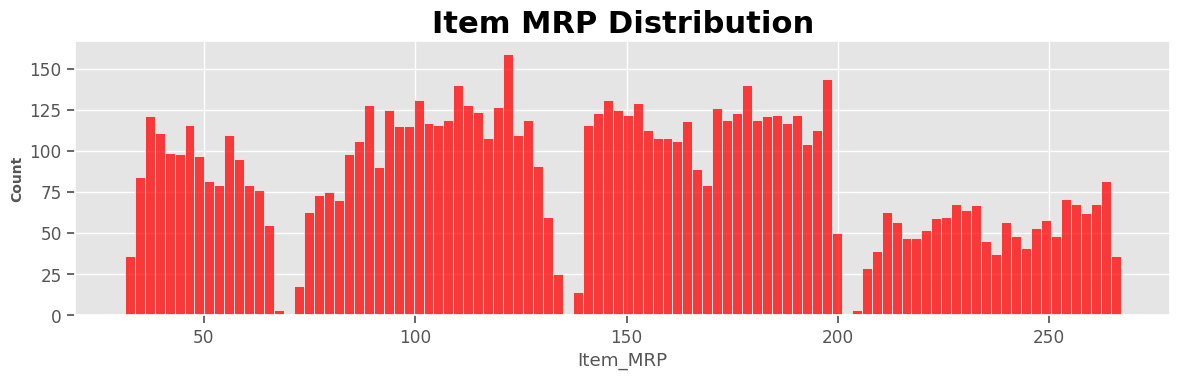

In [41]:
plt.figure(figsize=(12,4))

sns.histplot(data=df, x='Item_MRP',color='r', bins=100);

plt.title('Item MRP Distribution', fontsize=22,weight='bold')
plt.ylabel('Count', fontsize=10,weight='bold')

plt.tight_layout()
plt.show()


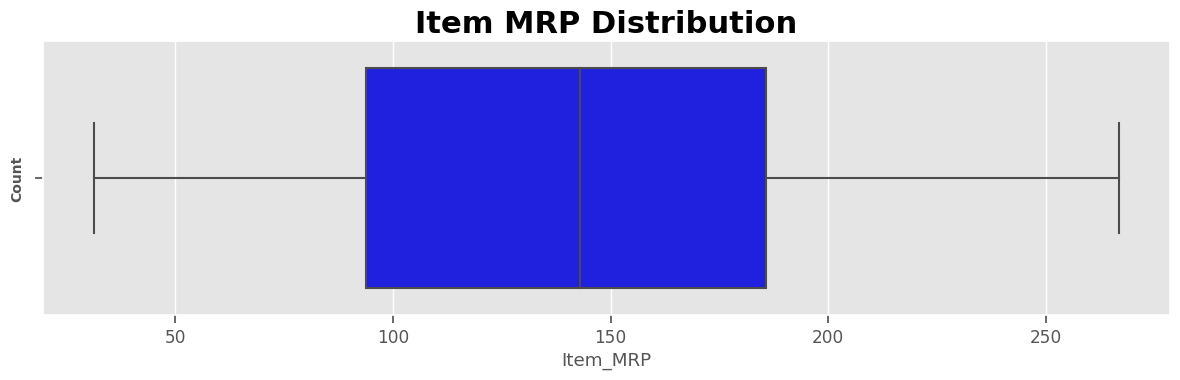

In [42]:
plt.figure(figsize=(12,4))

sns.boxplot(data=df, x='Item_MRP',color='b');

plt.title('Item MRP Distribution', fontsize=22,weight='bold')
plt.ylabel('Count', fontsize=10,weight='bold')

plt.tight_layout()
plt.show()

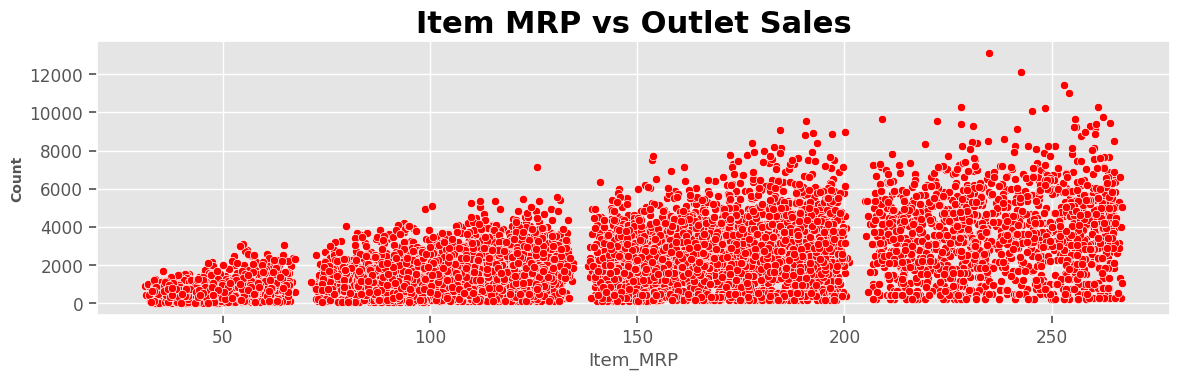

In [43]:
plt.figure(figsize=(12,4))

sns.scatterplot(data=df, x='Item_MRP',y='Item_Outlet_Sales',color='r')

plt.title('Item MRP vs Outlet Sales', fontsize=22,weight='bold')
plt.ylabel('Count', fontsize=10,weight='bold')

plt.tight_layout()
plt.show()

### **Plot data distribution**

array([[<AxesSubplot: title={'center': 'Item_Weight'}>,
        <AxesSubplot: title={'center': 'Item_Visibility'}>],
       [<AxesSubplot: title={'center': 'Item_MRP'}>,
        <AxesSubplot: title={'center': 'Outlet_Establishment_Year'}>],
       [<AxesSubplot: title={'center': 'Item_Outlet_Sales'}>,
        <AxesSubplot: >]], dtype=object)

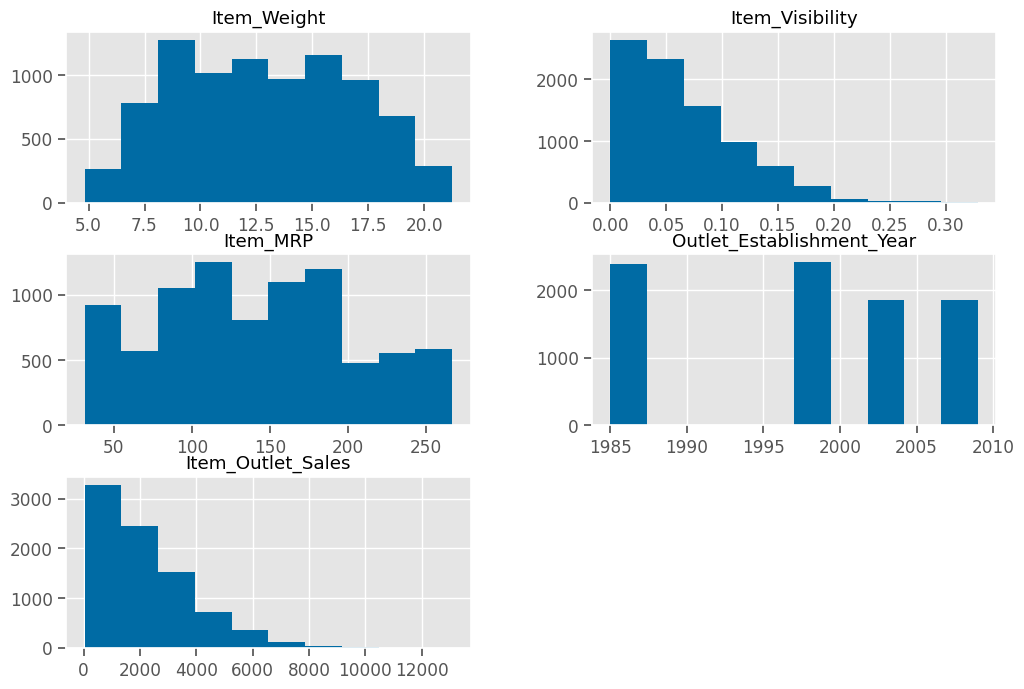

In [44]:
df.hist(figsize=(12,8))

### **Correlation Heatmap**

/var/folders/mm/04nbg7g95pgdtd1s3081zgfh0000gn/T/ipykernel_31399/3728401302.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<AxesSubplot: >

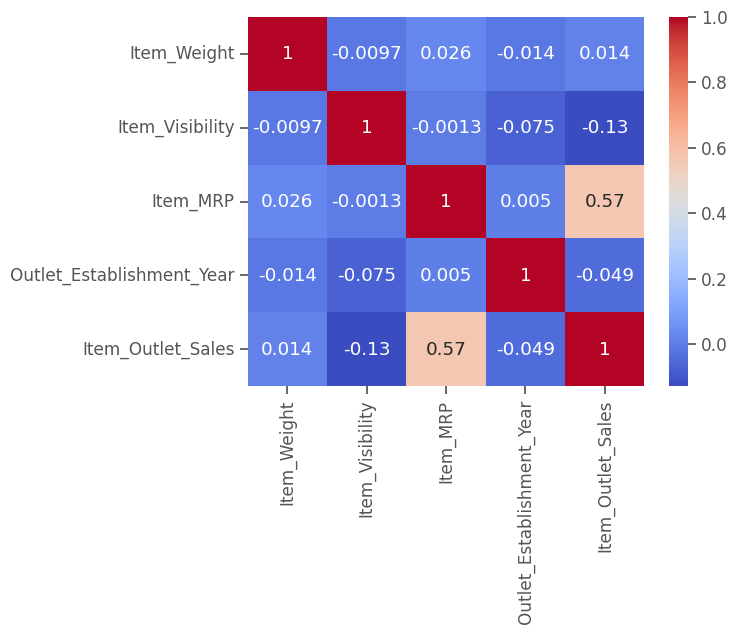

In [45]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

**Notes**:
This isn't a clear correlation between item mrp and item outlet sales. Item_MRP is the most essential feature to estimiate the item outlet sales.

## **Data Preprocessing**

#### **Identifying each feature as ordinal, numerical, nominal**
- ordinal features = none
- numeric features = ['Item_Weight','Item_Visibility','Item_MRP']
- nominal features = ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Idenfier','Outlet_Location_Type','Outlet_Size','Outlet_Type']


In [46]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.1+ MB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.745,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,7.076,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,16.174,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,18.143,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [47]:
df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype('object')

### **Split the Data**

In [48]:
# Define features and target variable
X = df.drop(columns =['Item_Identifier','Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

In [49]:
# Split the data into training and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)


### **Column Selectors**

In [50]:
# create a numeric selector
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')


In [51]:
cat_selector(X_train)

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [52]:
num_selector(X_train)

['Item_Weight', 'Item_Visibility', 'Item_MRP']

### **Imputers**

In [53]:
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
median_imputer = SimpleImputer(strategy='median')

#scaler
scaler = StandardScaler()
# instantiate one hot encoder
ohe = OneHotEncoder(handle_unknown='ignore',sparse=False)

### **Transformers**

In [54]:
# Numeric pipeline
numeric_pipe = make_pipeline(median_imputer, scaler)
numeric_pipe



Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [55]:
categorical_pipe  = make_pipeline(freq_imputer, ohe)
categorical_pipe 

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [56]:
#create tuples
num_tuple = (numeric_pipe,num_selector)
cat_tuple = (categorical_pipe, cat_selector)

### **Column Transformer**

In [57]:
# instantiate ColumnTransformer
preprocessor = make_column_transformer(num_tuple,cat_tuple,remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x160a3d460>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x160a3d9a0>)])

In [58]:
# fit ColumnTransformer on the training data
preprocessor.fit(X_train)                                   

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x160a3d460>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x160a3d9a0>)])

## **Model the Data**

### **Baseline Model**

In [59]:
# creating an instance of the model
dummy = DummyRegressor(strategy='mean')

# creating a model pipeline
dummy_pipe = make_pipeline(preprocessor, dummy)

# fitting the model
dummy_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x160a3d460>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x160a3d9a0>)])),
                ('dummyregressor', DummyRegressor())])

#### **Metrics**

In [60]:
# Displaying model performance metrics using a function
model_metrics(dummy_pipe,x_train=X_train, y_train=y_train,
                          x_test=X_test, y_test=y_test,
                          model_name='Dummy Model')



Dummy Model Train Scores
MAE: 1,360.2184 
MSE: 2,959,455.7045 
RMSE: 1,720.3069 
R2: 0.0000

Dummy Model Test Scores
MAE: 1,326.1210 
MSE: 2,772,144.4627 
RMSE: 1,664.9758 
R2: -0.0048



## **Linear Regression Model**


In [61]:
# creating an instance of the model
lin_reg = LinearRegression()

# creating a model pipeline
lin_reg_pipe = make_pipeline(preprocessor, lin_reg)

# fitting the model
lin_reg_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x160a3d460>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x160a3d9a0>)])),
                ('linearregression', LinearRegression())])

In [62]:
# Create model pipeline
train_pred = lin_reg_pipe.predict(X_train)
test_pred = lin_reg_pipe.predict(X_test)
test_pred[:10]

array([1428.,  674.,  856., 4342., 3360.,  710., 4764., 2068., 1382.,
       2818.])

#### **Metrics**

In [63]:
# Displaying model performance metrics using a function
model_metrics(lin_reg_pipe,x_train=X_train, y_train=y_train,
                          x_test=X_test, y_test=y_test,
                          model_name='Linear Regression')

Linear Regression Train Scores
MAE: 848.9872 
MSE: 1,300,271.1535 
RMSE: 1,140.2943 
R2: 0.5606

Linear Regression Test Scores
MAE: 808.0322 
MSE: 1,197,957.7117 
RMSE: 1,094.5125 
R2: 0.5658



In [67]:
# Evaluating the model
print("Linear Regression R-Squared:", r2_score(y_test, test_pred))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, test_pred)))

Linear Regression R-Squared: 0.5657964576297638
Linear Regression RMSE: 1094.512545238599


### Model Summary
- R2 scores suggest that around 56.06% of the variance in sales in the training set and 56.58% in the test set can be explained by your model. While not exceptionally high, these values indicate that the model has a moderate predictive ability. 
- RMSE values indicate the standard deviation of the residuals (prediction errors). Lower values of RMSE indicate better fit. The model typically predicts the sales with an error of around 1140.29 units for the training set and 1094.51 units for the test set.


Will use a Regression Tree Model to see if it shows better results. 

### **Regression Tree Model**

In [69]:
# creates the regression tree model
dec_tree = DecisionTreeRegressor(random_state=42) 

## Create a model pipeline
dec_tree_pipe = make_pipeline(preprocessor, dec_tree)

## Fit the model
dec_tree_pipe.fit(X_train, y_train) 


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x160a3d460>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x160a3d9a0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [70]:
# predict the target values for the training set and test set
train_preds = dec_tree_pipe.predict(X_train)
test_preds = dec_tree_pipe.predict(X_test)
test_preds[:10]

array([ 792.302 ,  796.9626,  952.094 , 4277.765 ,  589.233 ,  732.38  ,
       4555.4036,  421.4514, 1833.6132, 4138.6128])

In [71]:
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [72]:
dec_tree.get_depth()

37

In [73]:
dec_tree.get_n_leaves()

6276

In [89]:
# running the model with our optimized value for max_depth
dec_tree_best = DecisionTreeRegressor(max_depth = 6, random_state = 42)
dec_tree_best_pipe = make_pipeline(preprocessor,dec_tree_best)
dec_tree_best_pipe.fit(X_train, y_train)
train_score = dec_tree_best_pipe.score(X_train, y_train)
test_score = dec_tree_best_pipe.score(X_test, y_test)
print(train_score)
print(test_score)

0.6151247307957441
0.5832060598677521


In [90]:
# Displaying model performance metrics using a function
model_metrics(dec_tree_best_pipe,x_train=X_train, y_train=y_train,
                          x_test=X_test, y_test=y_test,
                          model_name='Decision Tree Model')

Decision Tree Model Train Scores
MAE: 747.3454 
MSE: 1,139,021.3110 
RMSE: 1,067.2494 
R2: 0.6151

Decision Tree Model Test Scores
MAE: 742.1905 
MSE: 1,149,925.0145 
RMSE: 1,072.3456 
R2: 0.5832



In [91]:
# List of values to try for max_depth:
depths = list(range(2, 10)) # Will input every value between 2 and 28
# Data frame to store the score for each value of max_depth:
scores = pd.DataFrame(index=depths, columns=['Test Score','Train Score'])
for depth in depths:
    dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dec_tree_pipe = make_pipeline(preprocessor, dec_tree)
    dec_tree_pipe.fit(X_train, y_train)
    train_score = dec_tree_pipe.score(X_train, y_train)
    test_score = dec_tree_pipe.score(X_test, y_test)
    scores.loc[depth, 'Train Score'] = train_score
    scores.loc[depth, 'Test Score'] = test_score


Text(0, 0.5, 'R2')

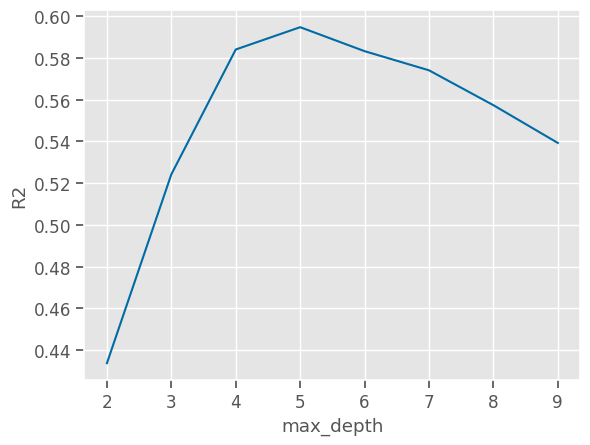

In [92]:
import matplotlib.pyplot as plt
plt.plot(depths, scores['Test Score'])
plt.xlabel('max_depth')
plt.ylabel('R2')

In [93]:
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head(8)

,Test Score,Train Score
5,0.594691,0.60393
4,0.584005,0.582625
6,0.583206,0.615125
7,0.574036,0.626984
8,0.557333,0.644565
9,0.539251,0.666328
3,0.524222,0.524218
2,0.433778,0.431641


In [94]:
# Let's run the model with our optimized value for max_depth
dec_tree_5 = DecisionTreeRegressor(max_depth = 5, random_state = 42)
dec_tree_pipe_5 = make_pipeline(preprocessor, dec_tree_5)
dec_tree_pipe_5.fit(X_train, y_train)
train_5_score = dec_tree_pipe_5.score(X_train, y_train)
test_5_score = dec_tree_pipe_5.score(X_test, y_test)
print(train_5_score)
print(test_5_score)


0.6039299895708462
0.5946910844033615


#### **Metrics**

In [95]:
## Display model performance metrics for decision tree
model_metrics(dec_tree_pipe_5, x_train=X_train, y_train=y_train,
              x_test=X_test, y_test=y_test,
              model_name = "Decision Tree Model")

Decision Tree Model Train Scores
MAE: 762.6551 
MSE: 1,172,151.6518 
RMSE: 1,082.6595 
R2: 0.6039

Decision Tree Model Test Scores
MAE: 738.6501 
MSE: 1,118,238.0927 
RMSE: 1,057.4678 
R2: 0.5947



In [96]:
# Displaying model performance metrics for the linear regression model again
model_metrics(lin_reg_pipe,x_train=X_train, y_train=y_train,
                          x_test=X_test, y_test=y_test,
                          model_name='Linear Regression')

Linear Regression Train Scores
MAE: 848.9872 
MSE: 1,300,271.1535 
RMSE: 1,140.2943 
R2: 0.5606

Linear Regression Test Scores
MAE: 808.0322 
MSE: 1,197,957.7117 
RMSE: 1,094.5125 
R2: 0.5658



## Comparison:
1. Mean Absolute Error (MAE):
- The Decision Tree model has lower MAE scores for both training and test datasets compared to the Linear Regression model. Lower MAE indicates better performance.
2. Mean Squared Error (MSE):
- The Decision Tree model has lower MSE scores for both training and test datasets compared to the Linear Regression model. Lower MSE indicates better performance.
3. Root Mean Squared Error (RMSE):
- The Decision Tree model has lower RMSE scores for both training and test datasets compared to the Linear Regression model. Lower RMSE indicates better performance.
4. R-Squared:
- The Decision Tree model has higher R^2 scores for both training and test datasets compared to the Linear Regression model. Higher R^2 indicates better performance.


## **Conclusion**

Overall, based on the metrics provided, the Decision Tree model outperforms the Linear Regression model on all evaluation metrics for both the training and test datasets. 

Therefore, the Decision Tree model is considered to have performed better in this comparison. It's worth noting that the Decision Tree model seems to have better generalization performance as it achieves lower error metrics on the test dataset while also having higher R^2 scores, indicating that it captures more variance in the target variable.